In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df=pd.read_csv('....../Stock.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-07-25,740.669983,742.609985,737.500000,739.770020,739.770020,1032400
1,2016-07-26,739.039978,741.690002,734.270020,738.419983,738.419983,1186700
2,2016-07-27,738.280029,744.460022,737.000000,741.770020,741.770020,1512500
3,2016-07-28,747.039978,748.650024,739.299988,745.909973,745.909973,3530200
4,2016-07-29,772.710022,778.549988,766.770020,768.789978,768.789978,3841500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Date         252 non-null object
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


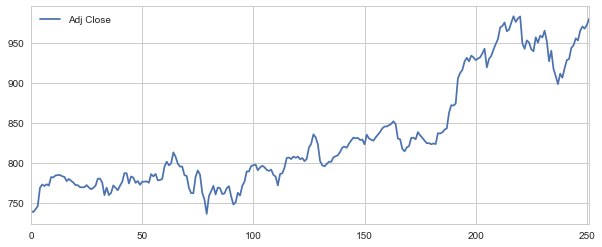

In [5]:
df['Adj Close'].plot(legend=True,figsize=(10,4))

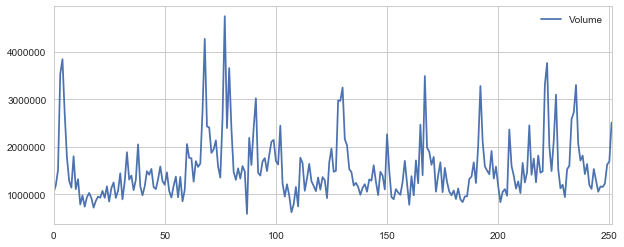

In [6]:
# plot the total volume of stock being traded each day
df['Volume'].plot(legend=True,figsize=(10,4))

In [7]:
df['Daily Return'] = df['Adj Close'].pct_change()

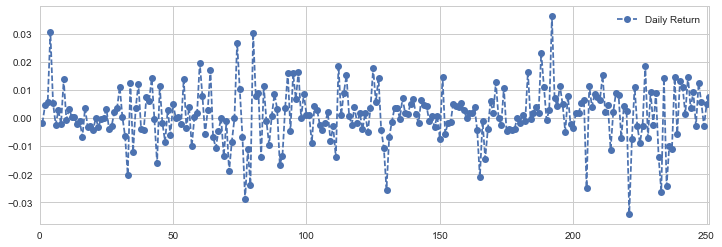

In [8]:
df['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

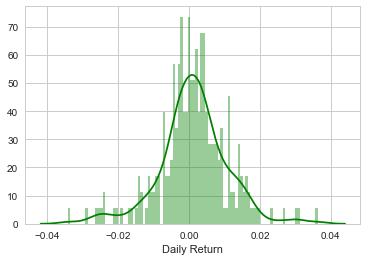

In [9]:
sns.distplot(df['Daily Return'].dropna(),bins=100,color='green')

In [10]:
closing_df = df['Adj Close']

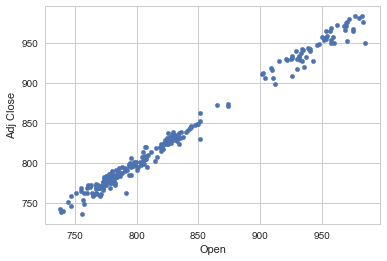

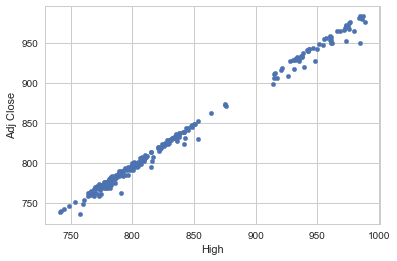

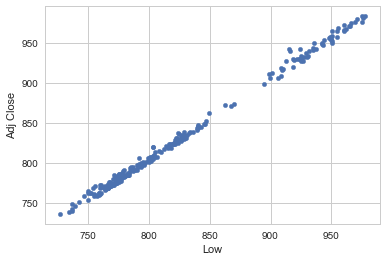

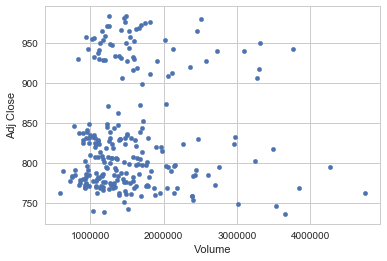

In [11]:
df.plot(kind='scatter', x='Open', y='Adj Close')
df.plot(kind='scatter', x='High', y='Adj Close')
df.plot(kind='scatter', x='Low', y='Adj Close')
df.plot(kind='scatter', x='Volume', y='Adj Close')

In [12]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.linear_model import LinearRegression

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X= df[['Open','High', 'Low', 'Volume']]
y=df['Adj Close']
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [14]:
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
Y_test=lm.predict(X_test)
Rsquare=lm.score(X_test, y_test)
Rsquare

0.99787097137318526

In [16]:
# Estimated coefficients od linear regression
lm.coef_

array([ -5.02251846e-01,   8.48729567e-01,   6.59960849e-01,
        -6.75152385e-07])

In [17]:
# Sum of residuals
lm.residues_

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


1570.3228360476783

In [18]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [19]:
ExplainedVariance=explained_variance_score(y_test, Y_test)
ExplainedVariance

0.99801644063187656

In [20]:
MeanAbsoluteError=mean_absolute_error(y_test, Y_test)
MeanAbsoluteError

2.0903275423397911

In [21]:
MeanSquaredError=mean_squared_error(y_test, Y_test)
MeanSquaredError

7.5955816373383627

In [22]:
r2=r2_score(y_test, Y_test)
r2

0.99787097137318537

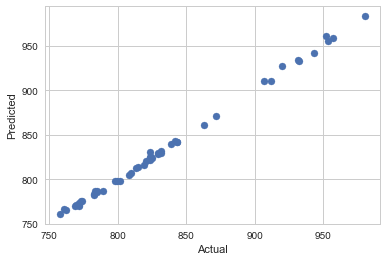

In [23]:
plt.scatter(y_test, Y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')